## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   7.314211  1060.617671  0.591372   2.456623  1.574758
1  24.970523  1559.141884  0.128584   7.185496  1.419550
2   7.801807   762.251497  0.011242  10.946274  0.885624
3  27.697540  1246.475825  0.761881   8.671474  1.513475
4  94.941637   450.344708  0.379274  10.495652  0.989207


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.11677 | train_mse: 4.28202 | train_mae: 1.48494 |  0:00:00s
epoch 1  | loss: 1.26412 | train_mse: 3.4188  | train_mae: 1.3873  |  0:00:00s
epoch 2  | loss: 0.9852  | train_mse: 2.82362 | train_mae: 1.24833 |  0:00:00s


epoch 3  | loss: 0.77618 | train_mse: 2.30772 | train_mae: 1.1339  |  0:00:00s
epoch 4  | loss: 0.78436 | train_mse: 2.02275 | train_mae: 1.07608 |  0:00:00s


epoch 5  | loss: 0.66951 | train_mse: 1.96618 | train_mae: 1.05356 |  0:00:00s
epoch 6  | loss: 0.65438 | train_mse: 1.87071 | train_mae: 0.99119 |  0:00:00s
epoch 7  | loss: 0.52372 | train_mse: 1.6084  | train_mae: 0.91377 |  0:00:00s


epoch 8  | loss: 0.53241 | train_mse: 1.43717 | train_mae: 0.87511 |  0:00:01s
epoch 9  | loss: 0.58314 | train_mse: 1.28699 | train_mae: 0.82336 |  0:00:01s


epoch 10 | loss: 0.48733 | train_mse: 1.1541  | train_mae: 0.78575 |  0:00:01s
epoch 11 | loss: 0.54441 | train_mse: 1.01625 | train_mae: 0.74298 |  0:00:01s


epoch 12 | loss: 0.43519 | train_mse: 0.91381 | train_mae: 0.70199 |  0:00:01s
epoch 13 | loss: 0.38778 | train_mse: 0.8243  | train_mae: 0.66381 |  0:00:01s


epoch 14 | loss: 0.36732 | train_mse: 0.70983 | train_mae: 0.62362 |  0:00:01s
epoch 15 | loss: 0.36613 | train_mse: 0.62958 | train_mae: 0.59149 |  0:00:02s


epoch 16 | loss: 0.53103 | train_mse: 0.58488 | train_mae: 0.5729  |  0:00:02s
epoch 17 | loss: 0.37386 | train_mse: 0.54449 | train_mae: 0.55293 |  0:00:02s


epoch 18 | loss: 0.42139 | train_mse: 0.51231 | train_mae: 0.53811 |  0:00:02s
epoch 19 | loss: 0.46042 | train_mse: 0.48341 | train_mae: 0.52258 |  0:00:02s


epoch 20 | loss: 0.36876 | train_mse: 0.45361 | train_mae: 0.50869 |  0:00:02s
epoch 21 | loss: 0.46734 | train_mse: 0.41275 | train_mae: 0.48766 |  0:00:02s


epoch 22 | loss: 0.30794 | train_mse: 0.37523 | train_mae: 0.46693 |  0:00:02s
epoch 23 | loss: 0.43392 | train_mse: 0.35326 | train_mae: 0.45324 |  0:00:03s


epoch 24 | loss: 0.32315 | train_mse: 0.31713 | train_mae: 0.43315 |  0:00:03s
epoch 25 | loss: 0.34003 | train_mse: 0.29597 | train_mae: 0.41956 |  0:00:03s


epoch 26 | loss: 0.28511 | train_mse: 0.28624 | train_mae: 0.41152 |  0:00:03s
epoch 27 | loss: 0.24697 | train_mse: 0.29005 | train_mae: 0.40928 |  0:00:03s


epoch 28 | loss: 0.39561 | train_mse: 0.29372 | train_mae: 0.40788 |  0:00:03s
epoch 29 | loss: 0.45111 | train_mse: 0.2807  | train_mae: 0.39786 |  0:00:03s


epoch 30 | loss: 0.24031 | train_mse: 0.26913 | train_mae: 0.38786 |  0:00:03s
epoch 31 | loss: 0.24719 | train_mse: 0.2551  | train_mae: 0.37865 |  0:00:03s


epoch 32 | loss: 0.20516 | train_mse: 0.24671 | train_mae: 0.37228 |  0:00:04s
epoch 33 | loss: 0.226   | train_mse: 0.23566 | train_mae: 0.36884 |  0:00:04s


epoch 34 | loss: 0.29753 | train_mse: 0.22006 | train_mae: 0.36058 |  0:00:04s
epoch 35 | loss: 0.36424 | train_mse: 0.2188  | train_mae: 0.35521 |  0:00:04s


epoch 36 | loss: 0.3526  | train_mse: 0.22368 | train_mae: 0.35559 |  0:00:04s
epoch 37 | loss: 0.33759 | train_mse: 0.222   | train_mae: 0.35273 |  0:00:04s


epoch 38 | loss: 0.21299 | train_mse: 0.2154  | train_mae: 0.34942 |  0:00:04s
epoch 39 | loss: 0.22172 | train_mse: 0.20679 | train_mae: 0.34933 |  0:00:04s
epoch 40 | loss: 0.25237 | train_mse: 0.21534 | train_mae: 0.35289 |  0:00:05s


epoch 41 | loss: 0.33902 | train_mse: 0.2279  | train_mae: 0.35354 |  0:00:05s
epoch 42 | loss: 0.3337  | train_mse: 0.24035 | train_mae: 0.35296 |  0:00:05s
epoch 43 | loss: 0.28683 | train_mse: 0.24478 | train_mae: 0.35223 |  0:00:05s


epoch 44 | loss: 0.41764 | train_mse: 0.24241 | train_mae: 0.35153 |  0:00:05s
epoch 45 | loss: 0.28526 | train_mse: 0.23589 | train_mae: 0.35189 |  0:00:05s
epoch 46 | loss: 0.25235 | train_mse: 0.23779 | train_mae: 0.35263 |  0:00:05s


epoch 47 | loss: 0.23333 | train_mse: 0.23578 | train_mae: 0.34835 |  0:00:05s
epoch 48 | loss: 0.26385 | train_mse: 0.23474 | train_mae: 0.3445  |  0:00:05s


epoch 49 | loss: 0.17265 | train_mse: 0.23538 | train_mae: 0.34194 |  0:00:05s
epoch 50 | loss: 0.21974 | train_mse: 0.23508 | train_mae: 0.3448  |  0:00:06s
epoch 51 | loss: 0.25017 | train_mse: 0.23202 | train_mae: 0.3458  |  0:00:06s


epoch 52 | loss: 0.22077 | train_mse: 0.2231  | train_mae: 0.34459 |  0:00:06s
epoch 53 | loss: 0.28107 | train_mse: 0.21656 | train_mae: 0.34133 |  0:00:06s
epoch 54 | loss: 0.30722 | train_mse: 0.20965 | train_mae: 0.33269 |  0:00:06s


epoch 55 | loss: 0.43839 | train_mse: 0.1994  | train_mae: 0.32352 |  0:00:06s
epoch 56 | loss: 0.41382 | train_mse: 0.18287 | train_mae: 0.311   |  0:00:06s
epoch 57 | loss: 0.23127 | train_mse: 0.175   | train_mae: 0.30723 |  0:00:06s


epoch 58 | loss: 0.38465 | train_mse: 0.16983 | train_mae: 0.30264 |  0:00:06s
epoch 59 | loss: 0.24411 | train_mse: 0.17339 | train_mae: 0.30871 |  0:00:06s
epoch 60 | loss: 0.32633 | train_mse: 0.17651 | train_mae: 0.31143 |  0:00:06s


epoch 61 | loss: 0.28527 | train_mse: 0.17075 | train_mae: 0.30743 |  0:00:07s
epoch 62 | loss: 0.23593 | train_mse: 0.1629  | train_mae: 0.30077 |  0:00:07s
epoch 63 | loss: 0.26047 | train_mse: 0.15884 | train_mae: 0.29537 |  0:00:07s


epoch 64 | loss: 0.24811 | train_mse: 0.15461 | train_mae: 0.29298 |  0:00:07s
epoch 65 | loss: 0.26189 | train_mse: 0.15364 | train_mae: 0.29565 |  0:00:07s
epoch 66 | loss: 0.35539 | train_mse: 0.1566  | train_mae: 0.29722 |  0:00:07s


epoch 67 | loss: 0.2083  | train_mse: 0.15919 | train_mae: 0.29955 |  0:00:07s
epoch 68 | loss: 0.16891 | train_mse: 0.16108 | train_mae: 0.30263 |  0:00:07s
epoch 69 | loss: 0.19052 | train_mse: 0.16115 | train_mae: 0.30207 |  0:00:07s


epoch 70 | loss: 0.19871 | train_mse: 0.16025 | train_mae: 0.29874 |  0:00:07s
epoch 71 | loss: 0.27143 | train_mse: 0.16048 | train_mae: 0.29784 |  0:00:07s
epoch 72 | loss: 0.25808 | train_mse: 0.16063 | train_mae: 0.29923 |  0:00:07s


epoch 73 | loss: 0.23904 | train_mse: 0.1624  | train_mae: 0.30066 |  0:00:08s
epoch 74 | loss: 0.28799 | train_mse: 0.16056 | train_mae: 0.30194 |  0:00:08s
epoch 75 | loss: 0.22116 | train_mse: 0.15905 | train_mae: 0.30523 |  0:00:08s


epoch 76 | loss: 0.19487 | train_mse: 0.15837 | train_mae: 0.30838 |  0:00:08s
epoch 77 | loss: 0.24048 | train_mse: 0.15889 | train_mae: 0.31004 |  0:00:08s
epoch 78 | loss: 0.30365 | train_mse: 0.15699 | train_mae: 0.3104  |  0:00:08s


epoch 79 | loss: 0.34104 | train_mse: 0.15611 | train_mae: 0.31022 |  0:00:08s
epoch 80 | loss: 0.25287 | train_mse: 0.15337 | train_mae: 0.30967 |  0:00:08s
epoch 81 | loss: 0.20613 | train_mse: 0.14969 | train_mae: 0.3074  |  0:00:08s


epoch 82 | loss: 0.22103 | train_mse: 0.14677 | train_mae: 0.30297 |  0:00:08s
epoch 83 | loss: 0.3791  | train_mse: 0.14536 | train_mae: 0.3002  |  0:00:08s
epoch 84 | loss: 0.20542 | train_mse: 0.14479 | train_mae: 0.30063 |  0:00:09s


epoch 85 | loss: 0.22314 | train_mse: 0.14293 | train_mae: 0.29719 |  0:00:09s
epoch 86 | loss: 0.24486 | train_mse: 0.14165 | train_mae: 0.29425 |  0:00:09s
epoch 87 | loss: 0.20152 | train_mse: 0.14126 | train_mae: 0.29393 |  0:00:09s


epoch 88 | loss: 0.25538 | train_mse: 0.14126 | train_mae: 0.29283 |  0:00:09s
epoch 89 | loss: 0.18363 | train_mse: 0.13937 | train_mae: 0.28983 |  0:00:09s
epoch 90 | loss: 0.1731  | train_mse: 0.13747 | train_mae: 0.28809 |  0:00:09s


epoch 91 | loss: 0.23948 | train_mse: 0.13485 | train_mae: 0.28365 |  0:00:09s
epoch 92 | loss: 0.33248 | train_mse: 0.13449 | train_mae: 0.2823  |  0:00:09s
epoch 93 | loss: 0.21473 | train_mse: 0.13669 | train_mae: 0.28619 |  0:00:09s


epoch 94 | loss: 0.19547 | train_mse: 0.13634 | train_mae: 0.28548 |  0:00:09s
epoch 95 | loss: 0.32361 | train_mse: 0.13551 | train_mae: 0.28729 |  0:00:10s
epoch 96 | loss: 0.18651 | train_mse: 0.1355  | train_mae: 0.2868  |  0:00:10s


epoch 97 | loss: 0.21499 | train_mse: 0.13494 | train_mae: 0.28308 |  0:00:10s
epoch 98 | loss: 0.34767 | train_mse: 0.13421 | train_mae: 0.28161 |  0:00:10s
epoch 99 | loss: 0.23204 | train_mse: 0.13415 | train_mae: 0.28364 |  0:00:10s


epoch 100| loss: 0.23124 | train_mse: 0.13344 | train_mae: 0.28203 |  0:00:10s
epoch 101| loss: 0.20594 | train_mse: 0.13078 | train_mae: 0.27835 |  0:00:10s
epoch 102| loss: 0.28348 | train_mse: 0.13066 | train_mae: 0.27707 |  0:00:10s


epoch 103| loss: 0.32866 | train_mse: 0.12952 | train_mae: 0.27592 |  0:00:10s
epoch 104| loss: 0.27221 | train_mse: 0.12949 | train_mae: 0.27755 |  0:00:10s
epoch 105| loss: 0.14906 | train_mse: 0.12827 | train_mae: 0.27684 |  0:00:10s


epoch 106| loss: 0.20051 | train_mse: 0.1263  | train_mae: 0.27424 |  0:00:10s
epoch 107| loss: 0.24008 | train_mse: 0.12538 | train_mae: 0.27218 |  0:00:11s
epoch 108| loss: 0.27752 | train_mse: 0.1249  | train_mae: 0.27471 |  0:00:11s


epoch 109| loss: 0.24607 | train_mse: 0.12368 | train_mae: 0.2747  |  0:00:11s
epoch 110| loss: 0.26867 | train_mse: 0.12501 | train_mae: 0.27841 |  0:00:11s
epoch 111| loss: 0.18307 | train_mse: 0.12558 | train_mae: 0.28005 |  0:00:11s


epoch 112| loss: 0.33578 | train_mse: 0.12538 | train_mae: 0.28016 |  0:00:11s
epoch 113| loss: 0.19619 | train_mse: 0.12414 | train_mae: 0.27863 |  0:00:11s
epoch 114| loss: 0.20646 | train_mse: 0.12308 | train_mae: 0.27701 |  0:00:11s


epoch 115| loss: 0.21153 | train_mse: 0.12121 | train_mae: 0.27584 |  0:00:11s
epoch 116| loss: 0.26911 | train_mse: 0.11995 | train_mae: 0.27464 |  0:00:11s
epoch 117| loss: 0.19218 | train_mse: 0.11948 | train_mae: 0.27358 |  0:00:11s


epoch 118| loss: 0.24551 | train_mse: 0.11884 | train_mae: 0.27177 |  0:00:12s
epoch 119| loss: 0.18387 | train_mse: 0.12149 | train_mae: 0.27505 |  0:00:12s
epoch 120| loss: 0.1734  | train_mse: 0.12487 | train_mae: 0.27806 |  0:00:12s


epoch 121| loss: 0.15815 | train_mse: 0.13045 | train_mae: 0.2804  |  0:00:12s
epoch 122| loss: 0.21036 | train_mse: 0.13244 | train_mae: 0.28049 |  0:00:12s
epoch 123| loss: 0.19422 | train_mse: 0.13462 | train_mae: 0.27935 |  0:00:12s


epoch 124| loss: 0.23145 | train_mse: 0.13365 | train_mae: 0.27985 |  0:00:12s
epoch 125| loss: 0.20704 | train_mse: 0.13298 | train_mae: 0.2798  |  0:00:12s
epoch 126| loss: 0.33988 | train_mse: 0.13118 | train_mae: 0.27846 |  0:00:12s


epoch 127| loss: 0.16114 | train_mse: 0.13039 | train_mae: 0.27857 |  0:00:12s
epoch 128| loss: 0.2029  | train_mse: 0.12661 | train_mae: 0.27408 |  0:00:12s
epoch 129| loss: 0.26575 | train_mse: 0.12095 | train_mae: 0.27259 |  0:00:13s


epoch 130| loss: 0.16324 | train_mse: 0.1192  | train_mae: 0.27444 |  0:00:13s
epoch 131| loss: 0.19364 | train_mse: 0.11777 | train_mae: 0.27312 |  0:00:13s
epoch 132| loss: 0.19544 | train_mse: 0.11566 | train_mae: 0.27101 |  0:00:13s


epoch 133| loss: 0.16636 | train_mse: 0.11465 | train_mae: 0.26876 |  0:00:13s
epoch 134| loss: 0.17948 | train_mse: 0.11701 | train_mae: 0.27048 |  0:00:13s


epoch 135| loss: 0.16065 | train_mse: 0.11716 | train_mae: 0.26964 |  0:00:13s
epoch 136| loss: 0.46797 | train_mse: 0.11669 | train_mae: 0.26863 |  0:00:13s
epoch 137| loss: 0.21937 | train_mse: 0.11909 | train_mae: 0.26871 |  0:00:13s


epoch 138| loss: 0.20619 | train_mse: 0.11886 | train_mae: 0.26897 |  0:00:13s
epoch 139| loss: 0.1463  | train_mse: 0.11713 | train_mae: 0.26593 |  0:00:13s
epoch 140| loss: 0.35722 | train_mse: 0.1164  | train_mae: 0.26438 |  0:00:14s


epoch 141| loss: 0.32762 | train_mse: 0.11721 | train_mae: 0.26493 |  0:00:14s
epoch 142| loss: 0.16926 | train_mse: 0.11359 | train_mae: 0.26211 |  0:00:14s
epoch 143| loss: 0.28639 | train_mse: 0.11163 | train_mae: 0.25936 |  0:00:14s


epoch 144| loss: 0.1763  | train_mse: 0.11078 | train_mae: 0.25776 |  0:00:14s
epoch 145| loss: 0.15304 | train_mse: 0.11132 | train_mae: 0.25709 |  0:00:14s
epoch 146| loss: 0.18916 | train_mse: 0.1119  | train_mae: 0.25374 |  0:00:14s


epoch 147| loss: 0.31761 | train_mse: 0.11155 | train_mae: 0.25419 |  0:00:14s
epoch 148| loss: 0.14161 | train_mse: 0.11333 | train_mae: 0.25641 |  0:00:14s


epoch 149| loss: 0.21658 | train_mse: 0.11485 | train_mae: 0.25711 |  0:00:14s
epoch 150| loss: 0.19123 | train_mse: 0.11254 | train_mae: 0.25585 |  0:00:14s
epoch 151| loss: 0.20356 | train_mse: 0.1105  | train_mae: 0.25492 |  0:00:15s


epoch 152| loss: 0.18867 | train_mse: 0.10877 | train_mae: 0.25389 |  0:00:15s
epoch 153| loss: 0.32798 | train_mse: 0.10727 | train_mae: 0.25305 |  0:00:15s
epoch 154| loss: 0.20559 | train_mse: 0.10625 | train_mae: 0.25317 |  0:00:15s


epoch 155| loss: 0.3143  | train_mse: 0.10829 | train_mae: 0.25737 |  0:00:15s
epoch 156| loss: 0.1318  | train_mse: 0.1098  | train_mae: 0.26118 |  0:00:15s
epoch 157| loss: 0.15075 | train_mse: 0.10839 | train_mae: 0.25771 |  0:00:15s


epoch 158| loss: 0.17783 | train_mse: 0.10742 | train_mae: 0.25376 |  0:00:15s
epoch 159| loss: 0.14782 | train_mse: 0.1096  | train_mae: 0.25419 |  0:00:15s
epoch 160| loss: 0.41168 | train_mse: 0.11086 | train_mae: 0.25696 |  0:00:15s


epoch 161| loss: 0.20197 | train_mse: 0.11355 | train_mae: 0.26084 |  0:00:15s
epoch 162| loss: 0.2527  | train_mse: 0.11645 | train_mae: 0.26383 |  0:00:16s
epoch 163| loss: 0.16122 | train_mse: 0.11539 | train_mae: 0.26145 |  0:00:16s


epoch 164| loss: 0.2056  | train_mse: 0.11519 | train_mae: 0.26109 |  0:00:16s
epoch 165| loss: 0.13946 | train_mse: 0.11609 | train_mae: 0.26168 |  0:00:16s
epoch 166| loss: 0.15206 | train_mse: 0.11446 | train_mae: 0.25855 |  0:00:16s


epoch 167| loss: 0.16384 | train_mse: 0.11091 | train_mae: 0.25401 |  0:00:16s
epoch 168| loss: 0.21512 | train_mse: 0.108   | train_mae: 0.2505  |  0:00:16s


epoch 169| loss: 0.16052 | train_mse: 0.10546 | train_mae: 0.24753 |  0:00:16s
epoch 170| loss: 0.17062 | train_mse: 0.10259 | train_mae: 0.24639 |  0:00:16s
epoch 171| loss: 0.17053 | train_mse: 0.10084 | train_mae: 0.24577 |  0:00:16s


epoch 172| loss: 0.13329 | train_mse: 0.09983 | train_mae: 0.24692 |  0:00:17s
epoch 173| loss: 0.189   | train_mse: 0.09984 | train_mae: 0.25043 |  0:00:17s
epoch 174| loss: 0.16543 | train_mse: 0.09915 | train_mae: 0.25013 |  0:00:17s


epoch 175| loss: 0.13451 | train_mse: 0.09891 | train_mae: 0.24877 |  0:00:17s
epoch 176| loss: 0.29715 | train_mse: 0.10001 | train_mae: 0.24928 |  0:00:17s
epoch 177| loss: 0.23628 | train_mse: 0.10097 | train_mae: 0.24971 |  0:00:17s


epoch 178| loss: 0.10249 | train_mse: 0.10193 | train_mae: 0.24875 |  0:00:17s
epoch 179| loss: 0.23968 | train_mse: 0.10261 | train_mae: 0.24518 |  0:00:17s
epoch 180| loss: 0.13231 | train_mse: 0.10377 | train_mae: 0.24494 |  0:00:17s


epoch 181| loss: 0.13879 | train_mse: 0.10384 | train_mae: 0.24774 |  0:00:17s
epoch 182| loss: 0.16239 | train_mse: 0.10183 | train_mae: 0.24659 |  0:00:17s
epoch 183| loss: 0.25014 | train_mse: 0.10024 | train_mae: 0.24727 |  0:00:17s


epoch 184| loss: 0.21582 | train_mse: 0.10159 | train_mae: 0.25004 |  0:00:18s
epoch 185| loss: 0.29043 | train_mse: 0.10321 | train_mae: 0.24952 |  0:00:18s
epoch 186| loss: 0.2114  | train_mse: 0.10398 | train_mae: 0.2466  |  0:00:18s


epoch 187| loss: 0.22034 | train_mse: 0.10685 | train_mae: 0.24615 |  0:00:18s
epoch 188| loss: 0.15644 | train_mse: 0.10844 | train_mae: 0.2457  |  0:00:18s
epoch 189| loss: 0.14554 | train_mse: 0.10786 | train_mae: 0.24598 |  0:00:18s


epoch 190| loss: 0.18477 | train_mse: 0.10808 | train_mae: 0.24729 |  0:00:18s
epoch 191| loss: 0.14523 | train_mse: 0.10871 | train_mae: 0.2489  |  0:00:18s


epoch 192| loss: 0.11875 | train_mse: 0.10668 | train_mae: 0.24674 |  0:00:18s
epoch 193| loss: 0.15384 | train_mse: 0.10539 | train_mae: 0.2482  |  0:00:18s
epoch 194| loss: 0.30224 | train_mse: 0.10222 | train_mae: 0.24709 |  0:00:18s


epoch 195| loss: 0.25541 | train_mse: 0.10033 | train_mae: 0.24836 |  0:00:19s
epoch 196| loss: 0.23158 | train_mse: 0.10423 | train_mae: 0.25313 |  0:00:19s
epoch 197| loss: 0.27278 | train_mse: 0.12287 | train_mae: 0.26039 |  0:00:19s


epoch 198| loss: 0.33425 | train_mse: 0.10163 | train_mae: 0.25028 |  0:00:19s
epoch 199| loss: 0.11883 | train_mse: 0.1006  | train_mae: 0.24721 |  0:00:19s
epoch 200| loss: 0.30092 | train_mse: 0.10054 | train_mae: 0.24543 |  0:00:19s


epoch 201| loss: 0.22007 | train_mse: 0.09951 | train_mae: 0.24464 |  0:00:19s
epoch 202| loss: 0.19883 | train_mse: 0.09876 | train_mae: 0.24369 |  0:00:19s


epoch 203| loss: 0.25485 | train_mse: 0.09861 | train_mae: 0.24472 |  0:00:19s
epoch 204| loss: 0.1641  | train_mse: 0.09681 | train_mae: 0.24366 |  0:00:19s
epoch 205| loss: 0.20346 | train_mse: 0.09587 | train_mae: 0.24302 |  0:00:19s


epoch 206| loss: 0.15032 | train_mse: 0.11229 | train_mae: 0.24838 |  0:00:20s
epoch 207| loss: 0.16993 | train_mse: 0.10395 | train_mae: 0.24444 |  0:00:20s
epoch 208| loss: 0.15031 | train_mse: 0.09222 | train_mae: 0.23567 |  0:00:20s


epoch 209| loss: 0.40224 | train_mse: 0.09519 | train_mae: 0.23754 |  0:00:20s
epoch 210| loss: 0.23348 | train_mse: 0.09914 | train_mae: 0.24332 |  0:00:20s
epoch 211| loss: 0.1186  | train_mse: 0.09872 | train_mae: 0.24208 |  0:00:20s


epoch 212| loss: 0.28464 | train_mse: 0.09993 | train_mae: 0.24509 |  0:00:20s
epoch 213| loss: 0.19106 | train_mse: 0.0972  | train_mae: 0.24025 |  0:00:20s
epoch 214| loss: 0.15574 | train_mse: 0.09395 | train_mae: 0.2353  |  0:00:20s


epoch 215| loss: 0.15211 | train_mse: 0.09126 | train_mae: 0.23389 |  0:00:20s
epoch 216| loss: 0.14627 | train_mse: 0.09067 | train_mae: 0.23462 |  0:00:20s
epoch 217| loss: 0.2061  | train_mse: 0.08892 | train_mae: 0.23293 |  0:00:21s


epoch 218| loss: 0.20162 | train_mse: 0.08887 | train_mae: 0.23293 |  0:00:21s
epoch 219| loss: 0.13894 | train_mse: 0.08686 | train_mae: 0.23162 |  0:00:21s
epoch 220| loss: 0.36589 | train_mse: 0.0833  | train_mae: 0.22963 |  0:00:21s


epoch 221| loss: 0.2014  | train_mse: 0.08022 | train_mae: 0.22889 |  0:00:21s
epoch 222| loss: 0.13364 | train_mse: 0.08049 | train_mae: 0.22665 |  0:00:21s
epoch 223| loss: 0.16584 | train_mse: 0.08169 | train_mae: 0.2254  |  0:00:21s


epoch 224| loss: 0.25246 | train_mse: 0.08292 | train_mae: 0.22521 |  0:00:21s
epoch 225| loss: 0.13817 | train_mse: 0.08395 | train_mae: 0.22491 |  0:00:21s
epoch 226| loss: 0.25601 | train_mse: 0.08381 | train_mae: 0.22685 |  0:00:21s


epoch 227| loss: 0.1431  | train_mse: 0.08127 | train_mae: 0.22688 |  0:00:22s
epoch 228| loss: 0.13401 | train_mse: 0.08193 | train_mae: 0.22703 |  0:00:22s
epoch 229| loss: 0.13947 | train_mse: 0.08225 | train_mae: 0.22695 |  0:00:22s


epoch 230| loss: 0.14648 | train_mse: 0.08261 | train_mae: 0.22718 |  0:00:22s
epoch 231| loss: 0.14318 | train_mse: 0.08146 | train_mae: 0.22627 |  0:00:22s
epoch 232| loss: 0.11439 | train_mse: 0.0788  | train_mae: 0.22437 |  0:00:22s


epoch 233| loss: 0.27903 | train_mse: 0.07888 | train_mae: 0.22462 |  0:00:22s
epoch 234| loss: 0.12614 | train_mse: 0.07716 | train_mae: 0.22193 |  0:00:22s


epoch 235| loss: 0.21018 | train_mse: 0.07649 | train_mae: 0.22181 |  0:00:22s
epoch 236| loss: 0.2407  | train_mse: 0.07466 | train_mae: 0.22096 |  0:00:22s
epoch 237| loss: 0.15887 | train_mse: 0.07567 | train_mae: 0.2218  |  0:00:22s


epoch 238| loss: 0.11108 | train_mse: 0.07501 | train_mae: 0.22106 |  0:00:23s
epoch 239| loss: 0.29209 | train_mse: 0.07558 | train_mae: 0.22014 |  0:00:23s
epoch 240| loss: 0.18546 | train_mse: 0.07902 | train_mae: 0.22102 |  0:00:23s


epoch 241| loss: 0.12863 | train_mse: 0.07828 | train_mae: 0.21937 |  0:00:23s
epoch 242| loss: 0.19116 | train_mse: 0.07878 | train_mae: 0.22159 |  0:00:23s
epoch 243| loss: 0.23263 | train_mse: 0.07897 | train_mae: 0.2231  |  0:00:23s


epoch 244| loss: 0.1361  | train_mse: 0.08031 | train_mae: 0.2243  |  0:00:23s
epoch 245| loss: 0.13139 | train_mse: 0.07975 | train_mae: 0.22442 |  0:00:23s
epoch 246| loss: 0.22779 | train_mse: 0.08175 | train_mae: 0.22633 |  0:00:23s


epoch 247| loss: 0.11543 | train_mse: 0.08345 | train_mae: 0.2292  |  0:00:23s
epoch 248| loss: 0.24098 | train_mse: 0.08159 | train_mae: 0.22883 |  0:00:23s
epoch 249| loss: 0.15784 | train_mse: 0.08113 | train_mae: 0.22753 |  0:00:24s


epoch 250| loss: 0.09612 | train_mse: 0.0812  | train_mae: 0.22776 |  0:00:24s
epoch 251| loss: 0.16947 | train_mse: 0.07838 | train_mae: 0.22581 |  0:00:24s
epoch 252| loss: 0.10672 | train_mse: 0.0765  | train_mae: 0.22505 |  0:00:24s


epoch 253| loss: 0.14187 | train_mse: 0.07485 | train_mae: 0.22368 |  0:00:24s
epoch 254| loss: 0.14609 | train_mse: 0.07426 | train_mae: 0.22116 |  0:00:24s
epoch 255| loss: 0.23542 | train_mse: 0.07321 | train_mae: 0.21845 |  0:00:24s


epoch 256| loss: 0.15194 | train_mse: 0.0715  | train_mae: 0.21608 |  0:00:24s
epoch 257| loss: 0.1286  | train_mse: 0.07142 | train_mae: 0.21655 |  0:00:24s
epoch 258| loss: 0.10948 | train_mse: 0.07046 | train_mae: 0.216   |  0:00:24s


epoch 259| loss: 0.17926 | train_mse: 0.07091 | train_mae: 0.21527 |  0:00:24s


epoch 260| loss: 0.20352 | train_mse: 0.07211 | train_mae: 0.21562 |  0:00:25s
epoch 261| loss: 0.16475 | train_mse: 0.07566 | train_mae: 0.21721 |  0:00:25s
epoch 262| loss: 0.11778 | train_mse: 0.07769 | train_mae: 0.21725 |  0:00:25s


epoch 263| loss: 0.16282 | train_mse: 0.07936 | train_mae: 0.21732 |  0:00:25s
epoch 264| loss: 0.18118 | train_mse: 0.07915 | train_mae: 0.21665 |  0:00:25s
epoch 265| loss: 0.15104 | train_mse: 0.07982 | train_mae: 0.21686 |  0:00:25s


epoch 266| loss: 0.10326 | train_mse: 0.08016 | train_mae: 0.21834 |  0:00:25s
epoch 267| loss: 0.12532 | train_mse: 0.08072 | train_mae: 0.2206  |  0:00:25s


epoch 268| loss: 0.14221 | train_mse: 0.08313 | train_mae: 0.22374 |  0:00:25s
epoch 269| loss: 0.11031 | train_mse: 0.08468 | train_mae: 0.22576 |  0:00:25s
epoch 270| loss: 0.17533 | train_mse: 0.08746 | train_mae: 0.22392 |  0:00:26s


epoch 271| loss: 0.10315 | train_mse: 0.09    | train_mae: 0.22698 |  0:00:26s
epoch 272| loss: 0.15572 | train_mse: 0.08981 | train_mae: 0.22686 |  0:00:26s
epoch 273| loss: 0.26232 | train_mse: 0.09021 | train_mae: 0.22576 |  0:00:26s


epoch 274| loss: 0.16835 | train_mse: 0.09024 | train_mae: 0.22487 |  0:00:26s
epoch 275| loss: 0.17583 | train_mse: 0.09009 | train_mae: 0.22364 |  0:00:26s
epoch 276| loss: 0.17219 | train_mse: 0.08949 | train_mae: 0.22203 |  0:00:26s


epoch 277| loss: 0.12259 | train_mse: 0.09054 | train_mae: 0.22214 |  0:00:26s
epoch 278| loss: 0.14308 | train_mse: 0.08893 | train_mae: 0.22262 |  0:00:26s
epoch 279| loss: 0.19212 | train_mse: 0.0889  | train_mae: 0.2235  |  0:00:26s


epoch 280| loss: 0.13126 | train_mse: 0.08488 | train_mae: 0.22088 |  0:00:26s
epoch 281| loss: 0.1293  | train_mse: 0.08112 | train_mae: 0.21879 |  0:00:27s
epoch 282| loss: 0.14272 | train_mse: 0.07936 | train_mae: 0.21914 |  0:00:27s


epoch 283| loss: 0.10452 | train_mse: 0.07941 | train_mae: 0.22014 |  0:00:27s
epoch 284| loss: 0.12848 | train_mse: 0.07956 | train_mae: 0.22064 |  0:00:27s
epoch 285| loss: 0.11789 | train_mse: 0.07813 | train_mae: 0.2185  |  0:00:27s


epoch 286| loss: 0.16814 | train_mse: 0.07893 | train_mae: 0.21908 |  0:00:27s
epoch 287| loss: 0.21669 | train_mse: 0.07729 | train_mae: 0.21637 |  0:00:27s
epoch 288| loss: 0.19555 | train_mse: 0.07572 | train_mae: 0.21575 |  0:00:27s


epoch 289| loss: 0.09051 | train_mse: 0.07554 | train_mae: 0.2159  |  0:00:27s
epoch 290| loss: 0.12052 | train_mse: 0.07422 | train_mae: 0.21365 |  0:00:27s
epoch 291| loss: 0.17294 | train_mse: 0.07586 | train_mae: 0.21587 |  0:00:27s


epoch 292| loss: 0.22345 | train_mse: 0.07771 | train_mae: 0.21853 |  0:00:27s
epoch 293| loss: 0.14458 | train_mse: 0.0809  | train_mae: 0.22203 |  0:00:28s
epoch 294| loss: 0.12535 | train_mse: 0.08177 | train_mae: 0.22197 |  0:00:28s


epoch 295| loss: 0.13323 | train_mse: 0.08246 | train_mae: 0.22326 |  0:00:28s
epoch 296| loss: 0.17657 | train_mse: 0.08059 | train_mae: 0.21986 |  0:00:28s
epoch 297| loss: 0.14929 | train_mse: 0.08041 | train_mae: 0.21843 |  0:00:28s


epoch 298| loss: 0.13335 | train_mse: 0.07824 | train_mae: 0.21482 |  0:00:28s
epoch 299| loss: 0.1188  | train_mse: 0.07701 | train_mae: 0.21429 |  0:00:28s
epoch 300| loss: 0.10683 | train_mse: 0.07582 | train_mae: 0.21462 |  0:00:28s


epoch 301| loss: 0.11595 | train_mse: 0.07261 | train_mae: 0.21339 |  0:00:28s
epoch 302| loss: 0.10145 | train_mse: 0.07025 | train_mae: 0.2126  |  0:00:28s
epoch 303| loss: 0.11248 | train_mse: 0.07039 | train_mae: 0.2142  |  0:00:28s


epoch 304| loss: 0.15863 | train_mse: 0.07047 | train_mae: 0.21486 |  0:00:29s
epoch 305| loss: 0.13865 | train_mse: 0.07    | train_mae: 0.21439 |  0:00:29s
epoch 306| loss: 0.1411  | train_mse: 0.06901 | train_mae: 0.21279 |  0:00:29s


epoch 307| loss: 0.17337 | train_mse: 0.067   | train_mae: 0.20818 |  0:00:29s
epoch 308| loss: 0.16615 | train_mse: 0.0677  | train_mae: 0.20887 |  0:00:29s
epoch 309| loss: 0.2484  | train_mse: 0.0675  | train_mae: 0.21035 |  0:00:29s


epoch 310| loss: 0.20228 | train_mse: 0.06807 | train_mae: 0.21173 |  0:00:29s
epoch 311| loss: 0.12567 | train_mse: 0.0678  | train_mae: 0.21055 |  0:00:29s


epoch 312| loss: 0.25973 | train_mse: 0.06727 | train_mae: 0.20933 |  0:00:29s
epoch 313| loss: 0.146   | train_mse: 0.06735 | train_mae: 0.20939 |  0:00:29s
epoch 314| loss: 0.17702 | train_mse: 0.0663  | train_mae: 0.20759 |  0:00:29s


epoch 315| loss: 0.31732 | train_mse: 0.06558 | train_mae: 0.2056  |  0:00:30s
epoch 316| loss: 0.09841 | train_mse: 0.06614 | train_mae: 0.20658 |  0:00:30s
epoch 317| loss: 0.10834 | train_mse: 0.06629 | train_mae: 0.20623 |  0:00:30s


epoch 318| loss: 0.15048 | train_mse: 0.06721 | train_mae: 0.20533 |  0:00:30s
epoch 319| loss: 0.13112 | train_mse: 0.06691 | train_mae: 0.20414 |  0:00:30s
epoch 320| loss: 0.12074 | train_mse: 0.06651 | train_mae: 0.20385 |  0:00:30s


epoch 321| loss: 0.09465 | train_mse: 0.0648  | train_mae: 0.20149 |  0:00:30s
epoch 322| loss: 0.13694 | train_mse: 0.0644  | train_mae: 0.20144 |  0:00:30s


epoch 323| loss: 0.15111 | train_mse: 0.06377 | train_mae: 0.20162 |  0:00:30s
epoch 324| loss: 0.23918 | train_mse: 0.06351 | train_mae: 0.20205 |  0:00:30s
epoch 325| loss: 0.19483 | train_mse: 0.06375 | train_mae: 0.20282 |  0:00:30s


epoch 326| loss: 0.11731 | train_mse: 0.0648  | train_mae: 0.20406 |  0:00:31s
epoch 327| loss: 0.1175  | train_mse: 0.06555 | train_mae: 0.20542 |  0:00:31s
epoch 328| loss: 0.13418 | train_mse: 0.06574 | train_mae: 0.20666 |  0:00:31s


epoch 329| loss: 0.13142 | train_mse: 0.06461 | train_mae: 0.20616 |  0:00:31s
epoch 330| loss: 0.23902 | train_mse: 0.06408 | train_mae: 0.20549 |  0:00:31s


epoch 331| loss: 0.14971 | train_mse: 0.0638  | train_mae: 0.20468 |  0:00:31s
epoch 332| loss: 0.14011 | train_mse: 0.06309 | train_mae: 0.20338 |  0:00:31s


epoch 333| loss: 0.11079 | train_mse: 0.06257 | train_mae: 0.20276 |  0:00:31s
epoch 334| loss: 0.09117 | train_mse: 0.06106 | train_mae: 0.2012  |  0:00:31s


epoch 335| loss: 0.1892  | train_mse: 0.06117 | train_mae: 0.20202 |  0:00:32s
epoch 336| loss: 0.12977 | train_mse: 0.06194 | train_mae: 0.20273 |  0:00:32s


epoch 337| loss: 0.11297 | train_mse: 0.06233 | train_mae: 0.2027  |  0:00:32s
epoch 338| loss: 0.08535 | train_mse: 0.06295 | train_mae: 0.20254 |  0:00:32s


epoch 339| loss: 0.14884 | train_mse: 0.06431 | train_mae: 0.20079 |  0:00:32s
epoch 340| loss: 0.16983 | train_mse: 0.0648  | train_mae: 0.20109 |  0:00:32s


epoch 341| loss: 0.15912 | train_mse: 0.06313 | train_mae: 0.20069 |  0:00:32s
epoch 342| loss: 0.09403 | train_mse: 0.06062 | train_mae: 0.19822 |  0:00:32s


epoch 343| loss: 0.18114 | train_mse: 0.05718 | train_mae: 0.19411 |  0:00:32s
epoch 344| loss: 0.21065 | train_mse: 0.05543 | train_mae: 0.19192 |  0:00:33s


epoch 345| loss: 0.10201 | train_mse: 0.05597 | train_mae: 0.19402 |  0:00:33s
epoch 346| loss: 0.11142 | train_mse: 0.05853 | train_mae: 0.19858 |  0:00:33s


epoch 347| loss: 0.14316 | train_mse: 0.0579  | train_mae: 0.1984  |  0:00:33s
epoch 348| loss: 0.10377 | train_mse: 0.05871 | train_mae: 0.19846 |  0:00:33s


epoch 349| loss: 0.10287 | train_mse: 0.05826 | train_mae: 0.19682 |  0:00:33s
epoch 350| loss: 0.12802 | train_mse: 0.05855 | train_mae: 0.1961  |  0:00:33s


epoch 351| loss: 0.15229 | train_mse: 0.05661 | train_mae: 0.19526 |  0:00:33s
epoch 352| loss: 0.12318 | train_mse: 0.05675 | train_mae: 0.19542 |  0:00:34s
epoch 353| loss: 0.11635 | train_mse: 0.05717 | train_mae: 0.1963  |  0:00:34s


epoch 354| loss: 0.23198 | train_mse: 0.05911 | train_mae: 0.19748 |  0:00:34s
epoch 355| loss: 0.13935 | train_mse: 0.05936 | train_mae: 0.19849 |  0:00:34s


epoch 356| loss: 0.10832 | train_mse: 0.05864 | train_mae: 0.19685 |  0:00:34s
epoch 357| loss: 0.17886 | train_mse: 0.05851 | train_mae: 0.19736 |  0:00:34s


epoch 358| loss: 0.1143  | train_mse: 0.05952 | train_mae: 0.19885 |  0:00:34s
epoch 359| loss: 0.08122 | train_mse: 0.05995 | train_mae: 0.19853 |  0:00:35s


epoch 360| loss: 0.18213 | train_mse: 0.06176 | train_mae: 0.20253 |  0:00:35s
epoch 361| loss: 0.11316 | train_mse: 0.06209 | train_mae: 0.20271 |  0:00:35s


epoch 362| loss: 0.07671 | train_mse: 0.0632  | train_mae: 0.20296 |  0:00:35s


epoch 363| loss: 0.20154 | train_mse: 0.0573  | train_mae: 0.19678 |  0:00:35s


epoch 364| loss: 0.13024 | train_mse: 0.06234 | train_mae: 0.20074 |  0:00:35s
epoch 365| loss: 0.25838 | train_mse: 0.0616  | train_mae: 0.19921 |  0:00:36s
epoch 366| loss: 0.13433 | train_mse: 0.06172 | train_mae: 0.20202 |  0:00:36s


epoch 367| loss: 0.13942 | train_mse: 0.06115 | train_mae: 0.20145 |  0:00:36s
epoch 368| loss: 0.13042 | train_mse: 0.0607  | train_mae: 0.20279 |  0:00:36s
epoch 369| loss: 0.17202 | train_mse: 0.06102 | train_mae: 0.20454 |  0:00:36s


epoch 370| loss: 0.09244 | train_mse: 0.05967 | train_mae: 0.20353 |  0:00:36s
epoch 371| loss: 0.15279 | train_mse: 0.06036 | train_mae: 0.20294 |  0:00:36s
epoch 372| loss: 0.08108 | train_mse: 0.05877 | train_mae: 0.19985 |  0:00:36s


epoch 373| loss: 0.22152 | train_mse: 0.0571  | train_mae: 0.19723 |  0:00:36s
epoch 374| loss: 0.13997 | train_mse: 0.05611 | train_mae: 0.19547 |  0:00:36s
epoch 375| loss: 0.22837 | train_mse: 0.05618 | train_mae: 0.19593 |  0:00:36s


epoch 376| loss: 0.13204 | train_mse: 0.05615 | train_mae: 0.19355 |  0:00:37s
epoch 377| loss: 0.20213 | train_mse: 0.05717 | train_mae: 0.1952  |  0:00:37s
epoch 378| loss: 0.058   | train_mse: 0.05823 | train_mae: 0.19696 |  0:00:37s


epoch 379| loss: 0.1008  | train_mse: 0.06055 | train_mae: 0.19956 |  0:00:37s
epoch 380| loss: 0.11303 | train_mse: 0.06235 | train_mae: 0.20107 |  0:00:37s
epoch 381| loss: 0.17307 | train_mse: 0.06359 | train_mae: 0.20134 |  0:00:37s


epoch 382| loss: 0.16982 | train_mse: 0.06232 | train_mae: 0.19753 |  0:00:37s
epoch 383| loss: 0.16628 | train_mse: 0.06542 | train_mae: 0.20059 |  0:00:37s
epoch 384| loss: 0.11326 | train_mse: 0.06683 | train_mae: 0.20311 |  0:00:37s


epoch 385| loss: 0.10386 | train_mse: 0.06888 | train_mae: 0.20471 |  0:00:37s
epoch 386| loss: 0.1154  | train_mse: 0.06819 | train_mae: 0.2036  |  0:00:37s
epoch 387| loss: 0.09187 | train_mse: 0.06517 | train_mae: 0.19803 |  0:00:38s


epoch 388| loss: 0.19276 | train_mse: 0.06315 | train_mae: 0.19423 |  0:00:38s
epoch 389| loss: 0.08408 | train_mse: 0.06144 | train_mae: 0.19211 |  0:00:38s
epoch 390| loss: 0.4159  | train_mse: 0.06088 | train_mae: 0.19088 |  0:00:38s


epoch 391| loss: 0.18988 | train_mse: 0.05921 | train_mae: 0.18915 |  0:00:38s
epoch 392| loss: 0.13815 | train_mse: 0.05781 | train_mae: 0.18917 |  0:00:38s
epoch 393| loss: 0.08723 | train_mse: 0.05816 | train_mae: 0.18971 |  0:00:38s


epoch 394| loss: 0.09506 | train_mse: 0.05701 | train_mae: 0.18822 |  0:00:38s
epoch 395| loss: 0.10835 | train_mse: 0.05625 | train_mae: 0.18864 |  0:00:38s
epoch 396| loss: 0.08163 | train_mse: 0.05532 | train_mae: 0.18855 |  0:00:38s


epoch 397| loss: 0.15883 | train_mse: 0.05381 | train_mae: 0.18534 |  0:00:38s
epoch 398| loss: 0.07231 | train_mse: 0.05337 | train_mae: 0.18173 |  0:00:39s
epoch 399| loss: 0.11769 | train_mse: 0.05388 | train_mae: 0.18328 |  0:00:39s


epoch 400| loss: 0.10587 | train_mse: 0.05464 | train_mae: 0.18473 |  0:00:39s
epoch 401| loss: 0.08013 | train_mse: 0.05555 | train_mae: 0.18828 |  0:00:39s
epoch 402| loss: 0.11812 | train_mse: 0.05669 | train_mae: 0.19174 |  0:00:39s


epoch 403| loss: 0.2222  | train_mse: 0.05734 | train_mae: 0.19378 |  0:00:39s
epoch 404| loss: 0.20466 | train_mse: 0.05759 | train_mae: 0.19565 |  0:00:39s
epoch 405| loss: 0.21047 | train_mse: 0.05715 | train_mae: 0.196   |  0:00:39s


epoch 406| loss: 0.08008 | train_mse: 0.05676 | train_mae: 0.19463 |  0:00:39s
epoch 407| loss: 0.14248 | train_mse: 0.0571  | train_mae: 0.19472 |  0:00:39s
epoch 408| loss: 0.08922 | train_mse: 0.05816 | train_mae: 0.19557 |  0:00:39s


epoch 409| loss: 0.09461 | train_mse: 0.05817 | train_mae: 0.19379 |  0:00:39s
epoch 410| loss: 0.1303  | train_mse: 0.05905 | train_mae: 0.19289 |  0:00:40s
epoch 411| loss: 0.14141 | train_mse: 0.05768 | train_mae: 0.19003 |  0:00:40s


epoch 412| loss: 0.07485 | train_mse: 0.05844 | train_mae: 0.18784 |  0:00:40s
epoch 413| loss: 0.13633 | train_mse: 0.06029 | train_mae: 0.18872 |  0:00:40s
epoch 414| loss: 0.08292 | train_mse: 0.06236 | train_mae: 0.18986 |  0:00:40s


epoch 415| loss: 0.08325 | train_mse: 0.06666 | train_mae: 0.19648 |  0:00:40s
epoch 416| loss: 0.14026 | train_mse: 0.07064 | train_mae: 0.20194 |  0:00:40s
epoch 417| loss: 0.10854 | train_mse: 0.071   | train_mae: 0.20165 |  0:00:40s


epoch 418| loss: 0.13655 | train_mse: 0.07134 | train_mae: 0.20189 |  0:00:40s
epoch 419| loss: 0.12633 | train_mse: 0.06924 | train_mae: 0.19883 |  0:00:40s
epoch 420| loss: 0.14123 | train_mse: 0.06494 | train_mae: 0.19372 |  0:00:40s


epoch 421| loss: 0.10829 | train_mse: 0.06336 | train_mae: 0.19209 |  0:00:41s
epoch 422| loss: 0.08457 | train_mse: 0.0604  | train_mae: 0.18881 |  0:00:41s
epoch 423| loss: 0.15896 | train_mse: 0.06041 | train_mae: 0.18906 |  0:00:41s


epoch 424| loss: 0.1369  | train_mse: 0.0614  | train_mae: 0.19252 |  0:00:41s
epoch 425| loss: 0.18405 | train_mse: 0.06123 | train_mae: 0.19294 |  0:00:41s
epoch 426| loss: 0.16425 | train_mse: 0.05983 | train_mae: 0.19053 |  0:00:41s


epoch 427| loss: 0.21072 | train_mse: 0.05833 | train_mae: 0.1874  |  0:00:41s
epoch 428| loss: 0.06847 | train_mse: 0.05651 | train_mae: 0.18664 |  0:00:41s
epoch 429| loss: 0.08045 | train_mse: 0.05476 | train_mae: 0.18533 |  0:00:41s


epoch 430| loss: 0.15479 | train_mse: 0.05449 | train_mae: 0.1851  |  0:00:41s
epoch 431| loss: 0.10559 | train_mse: 0.05369 | train_mae: 0.18399 |  0:00:41s
epoch 432| loss: 0.30019 | train_mse: 0.0552  | train_mae: 0.18604 |  0:00:42s


epoch 433| loss: 0.20416 | train_mse: 0.05658 | train_mae: 0.1873  |  0:00:42s
epoch 434| loss: 0.09877 | train_mse: 0.06016 | train_mae: 0.19031 |  0:00:42s
epoch 435| loss: 0.07168 | train_mse: 0.06146 | train_mae: 0.19207 |  0:00:42s


epoch 436| loss: 0.08588 | train_mse: 0.0615  | train_mae: 0.19337 |  0:00:42s
epoch 437| loss: 0.17803 | train_mse: 0.06429 | train_mae: 0.19776 |  0:00:42s
epoch 438| loss: 0.12508 | train_mse: 0.06332 | train_mae: 0.19706 |  0:00:42s


epoch 439| loss: 0.11518 | train_mse: 0.06299 | train_mae: 0.19844 |  0:00:42s
epoch 440| loss: 0.15945 | train_mse: 0.066   | train_mae: 0.20502 |  0:00:42s
epoch 441| loss: 0.0786  | train_mse: 0.06467 | train_mae: 0.20311 |  0:00:42s


epoch 442| loss: 0.14554 | train_mse: 0.05997 | train_mae: 0.19478 |  0:00:42s
epoch 443| loss: 0.16474 | train_mse: 0.05633 | train_mae: 0.18992 |  0:00:42s
epoch 444| loss: 0.15841 | train_mse: 0.05511 | train_mae: 0.18957 |  0:00:43s


epoch 445| loss: 0.19229 | train_mse: 0.05279 | train_mae: 0.18372 |  0:00:43s
epoch 446| loss: 0.09449 | train_mse: 0.05045 | train_mae: 0.17867 |  0:00:43s
epoch 447| loss: 0.12465 | train_mse: 0.04863 | train_mae: 0.17467 |  0:00:43s


epoch 448| loss: 0.2409  | train_mse: 0.04845 | train_mae: 0.17512 |  0:00:43s
epoch 449| loss: 0.08375 | train_mse: 0.04852 | train_mae: 0.17368 |  0:00:43s
epoch 450| loss: 0.09873 | train_mse: 0.0486  | train_mae: 0.17292 |  0:00:43s


epoch 451| loss: 0.08017 | train_mse: 0.04862 | train_mae: 0.1711  |  0:00:43s
epoch 452| loss: 0.09245 | train_mse: 0.0481  | train_mae: 0.16974 |  0:00:43s


epoch 453| loss: 0.08035 | train_mse: 0.0474  | train_mae: 0.16761 |  0:00:43s
epoch 454| loss: 0.25654 | train_mse: 0.04776 | train_mae: 0.17124 |  0:00:43s
epoch 455| loss: 0.09619 | train_mse: 0.0488  | train_mae: 0.17319 |  0:00:44s


epoch 456| loss: 0.07833 | train_mse: 0.05075 | train_mae: 0.17523 |  0:00:44s
epoch 457| loss: 0.14969 | train_mse: 0.05245 | train_mae: 0.1764  |  0:00:44s
epoch 458| loss: 0.16591 | train_mse: 0.05513 | train_mae: 0.17878 |  0:00:44s


epoch 459| loss: 0.11059 | train_mse: 0.05764 | train_mae: 0.1813  |  0:00:44s
epoch 460| loss: 0.12835 | train_mse: 0.05942 | train_mae: 0.18293 |  0:00:44s
epoch 461| loss: 0.11862 | train_mse: 0.05986 | train_mae: 0.18458 |  0:00:44s


epoch 462| loss: 0.12299 | train_mse: 0.05928 | train_mae: 0.18498 |  0:00:44s
epoch 463| loss: 0.12691 | train_mse: 0.05771 | train_mae: 0.18284 |  0:00:44s
epoch 464| loss: 0.07824 | train_mse: 0.05712 | train_mae: 0.17945 |  0:00:44s


epoch 465| loss: 0.1384  | train_mse: 0.05504 | train_mae: 0.17404 |  0:00:44s
epoch 466| loss: 0.09671 | train_mse: 0.0516  | train_mae: 0.17127 |  0:00:45s
epoch 467| loss: 0.07671 | train_mse: 0.04842 | train_mae: 0.16909 |  0:00:45s


epoch 468| loss: 0.16883 | train_mse: 0.04536 | train_mae: 0.16613 |  0:00:45s
epoch 469| loss: 0.25204 | train_mse: 0.04426 | train_mae: 0.16469 |  0:00:45s
epoch 470| loss: 0.1094  | train_mse: 0.04424 | train_mae: 0.16582 |  0:00:45s


epoch 471| loss: 0.07103 | train_mse: 0.045   | train_mae: 0.16841 |  0:00:45s
epoch 472| loss: 0.09273 | train_mse: 0.04575 | train_mae: 0.17111 |  0:00:45s
epoch 473| loss: 0.07887 | train_mse: 0.04686 | train_mae: 0.17372 |  0:00:45s


epoch 474| loss: 0.09694 | train_mse: 0.04725 | train_mae: 0.17323 |  0:00:45s
epoch 475| loss: 0.15377 | train_mse: 0.04689 | train_mae: 0.17211 |  0:00:45s
epoch 476| loss: 0.06974 | train_mse: 0.04731 | train_mae: 0.1729  |  0:00:45s


epoch 477| loss: 0.08957 | train_mse: 0.04845 | train_mae: 0.17412 |  0:00:46s
epoch 478| loss: 0.1612  | train_mse: 0.04903 | train_mae: 0.17512 |  0:00:46s
epoch 479| loss: 0.28561 | train_mse: 0.04953 | train_mae: 0.1746  |  0:00:46s


epoch 480| loss: 0.06982 | train_mse: 0.05087 | train_mae: 0.1755  |  0:00:46s
epoch 481| loss: 0.12273 | train_mse: 0.05061 | train_mae: 0.17386 |  0:00:46s
epoch 482| loss: 0.12511 | train_mse: 0.05063 | train_mae: 0.17312 |  0:00:46s


epoch 483| loss: 0.09334 | train_mse: 0.04958 | train_mae: 0.17073 |  0:00:46s
epoch 484| loss: 0.17164 | train_mse: 0.04655 | train_mae: 0.16633 |  0:00:46s


epoch 485| loss: 0.19226 | train_mse: 0.0479  | train_mae: 0.16991 |  0:00:46s
epoch 486| loss: 0.07205 | train_mse: 0.04806 | train_mae: 0.16993 |  0:00:46s
epoch 487| loss: 0.29904 | train_mse: 0.0467  | train_mae: 0.16841 |  0:00:46s


epoch 488| loss: 0.09428 | train_mse: 0.04753 | train_mae: 0.17059 |  0:00:46s
epoch 489| loss: 0.10373 | train_mse: 0.05045 | train_mae: 0.17559 |  0:00:47s
epoch 490| loss: 0.06906 | train_mse: 0.05343 | train_mae: 0.18009 |  0:00:47s


epoch 491| loss: 0.11594 | train_mse: 0.05446 | train_mae: 0.1828  |  0:00:47s
epoch 492| loss: 0.09948 | train_mse: 0.05455 | train_mae: 0.18317 |  0:00:47s
epoch 493| loss: 0.08585 | train_mse: 0.05303 | train_mae: 0.18135 |  0:00:47s


epoch 494| loss: 0.06298 | train_mse: 0.05033 | train_mae: 0.17687 |  0:00:47s
epoch 495| loss: 0.08907 | train_mse: 0.05011 | train_mae: 0.17593 |  0:00:47s
epoch 496| loss: 0.09123 | train_mse: 0.05149 | train_mae: 0.17737 |  0:00:47s


epoch 497| loss: 0.11671 | train_mse: 0.05355 | train_mae: 0.17923 |  0:00:47s
epoch 498| loss: 0.08553 | train_mse: 0.05422 | train_mae: 0.18023 |  0:00:47s


epoch 499| loss: 0.10478 | train_mse: 0.05429 | train_mae: 0.18045 |  0:00:47s
epoch 500| loss: 0.09929 | train_mse: 0.05434 | train_mae: 0.18042 |  0:00:48s
epoch 501| loss: 0.10406 | train_mse: 0.05482 | train_mae: 0.18068 |  0:00:48s


epoch 502| loss: 0.0882  | train_mse: 0.05464 | train_mae: 0.18043 |  0:00:48s
epoch 503| loss: 0.15021 | train_mse: 0.05363 | train_mae: 0.17972 |  0:00:48s


epoch 504| loss: 0.08807 | train_mse: 0.05174 | train_mae: 0.17895 |  0:00:48s
epoch 505| loss: 0.08874 | train_mse: 0.05018 | train_mae: 0.17685 |  0:00:48s


epoch 506| loss: 0.1769  | train_mse: 0.04983 | train_mae: 0.17747 |  0:00:48s
epoch 507| loss: 0.07374 | train_mse: 0.05093 | train_mae: 0.17843 |  0:00:48s
epoch 508| loss: 0.08096 | train_mse: 0.05176 | train_mae: 0.17911 |  0:00:48s


epoch 509| loss: 0.07801 | train_mse: 0.0532  | train_mae: 0.18259 |  0:00:48s
epoch 510| loss: 0.14695 | train_mse: 0.05598 | train_mae: 0.18727 |  0:00:48s
epoch 511| loss: 0.10204 | train_mse: 0.05843 | train_mae: 0.19223 |  0:00:49s


epoch 512| loss: 0.14565 | train_mse: 0.06126 | train_mae: 0.19581 |  0:00:49s
epoch 513| loss: 0.22644 | train_mse: 0.06197 | train_mae: 0.19571 |  0:00:49s
epoch 514| loss: 0.09537 | train_mse: 0.06291 | train_mae: 0.19543 |  0:00:49s


epoch 515| loss: 0.13056 | train_mse: 0.06175 | train_mae: 0.19235 |  0:00:49s
epoch 516| loss: 0.07328 | train_mse: 0.05881 | train_mae: 0.18631 |  0:00:49s
epoch 517| loss: 0.06467 | train_mse: 0.05608 | train_mae: 0.18049 |  0:00:49s


epoch 518| loss: 0.06764 | train_mse: 0.05291 | train_mae: 0.17554 |  0:00:49s
epoch 519| loss: 0.13565 | train_mse: 0.05151 | train_mae: 0.17512 |  0:00:49s

Early stopping occurred at epoch 519 with best_epoch = 469 and best_train_mae = 0.16469
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.34959404707297637


ABC Pre-generator MAE 0.8888317043158965


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

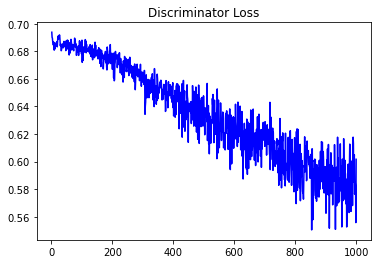

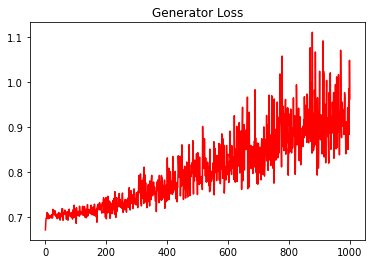

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5143983787186444


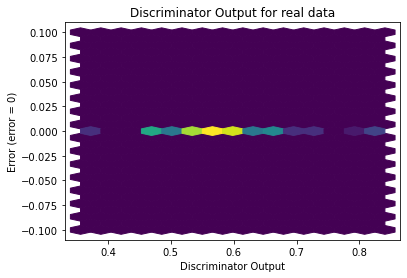

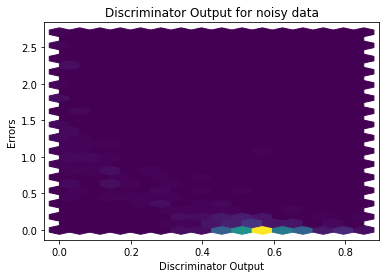

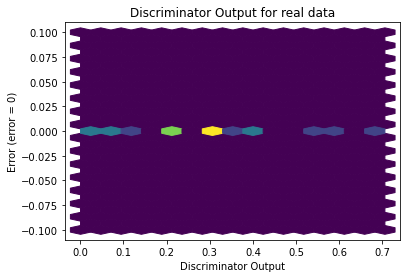

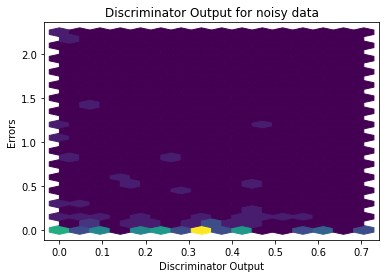

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


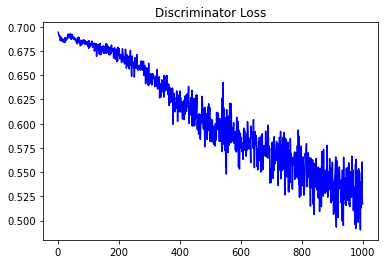

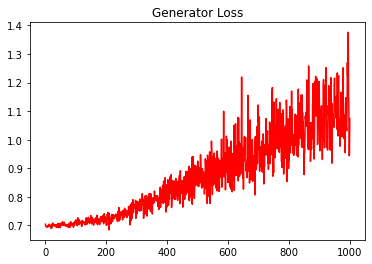

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5152311490345747


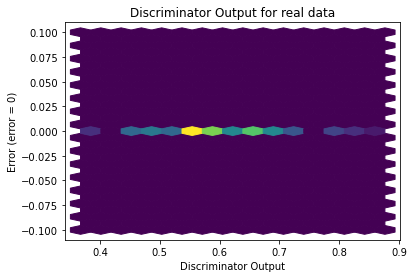

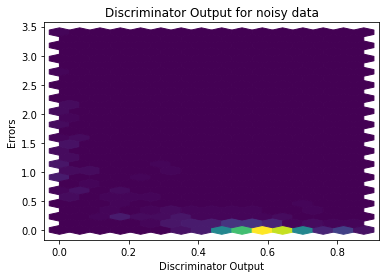

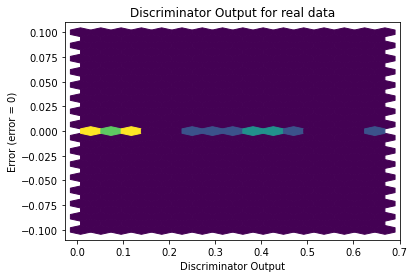

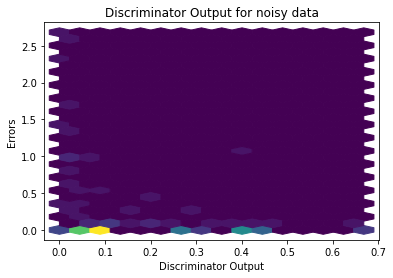

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9098]], requires_grad=True)
